# Exploratory Data Analysis
Data Science Workflow:
1. Start with a question - 
2. Get & Clean the data - 
3. Perform EDA
    - **Input:** a corpus and a document-term matrix 
    - **EDA:** Summarize the main characteristics of the data set 
        - **Data:** Determine the format of the raw data which will need to start
        - **Aggregate:** Figure out how to aggregate the data
        - **Visualize:** Find the best way to visualize the data
        - **Insights:** Extract some key takeways from the visualizations
    - **Output:** figure out the main trends in the data and if it make sense
4. Apply Techniques
5. Share Insights
               




We are going to look at the following for each comedian:

1. **Top words** - Find the most common words for each comedian --> find these and create word clouds
2. **Vocabulary** - Take a look at the unique number of words used and also how quickly someone speaks
3. **Amount of profanity** - Note the number of swear words said



**Used Packages**
- `wordcloud`: Create word clouds in Python
- `matplotlib`: Data visualizations in Python

In [1]:
# Read in the document-term matrix
import pandas as pd

data_dtm = pd.read_pickle('dtm.pkl')
data_dtm = data_dtm.transpose()
data_dtm.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [2]:
data_dtm.columns

Index(['ali', 'anthony', 'bill', 'bo', 'dave', 'hasan', 'jim', 'joe', 'john',
       'louis', 'mike', 'ricky'],
      dtype='object')

In [3]:
# Find the top 30 words and their counts (values) said by each comedian
top_dict = {}
for c in data_dtm.columns:
    top = data_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

# top_dict

In [4]:
top_dict.items()

dict_items([('ali', [('like', 126), ('im', 74), ('know', 69), ('wa', 68), ('just', 64), ('dont', 61), ('shit', 35), ('thats', 34), ('youre', 31), ('gonna', 28), ('ok', 26), ('lot', 25), ('woman', 25), ('wanna', 21), ('day', 21), ('oh', 21), ('husband', 21), ('gotta', 21), ('time', 20), ('got', 19), ('right', 19), ('cause', 18), ('people', 16), ('need', 15), ('pregnant', 15), ('god', 14), ('asian', 14), ('come', 14), ('dude', 14), ('tell', 14)]), ('anthony', [('wa', 73), ('im', 60), ('like', 51), ('joke', 50), ('know', 39), ('dont', 38), ('got', 34), ('thats', 31), ('said', 31), ('guy', 29), ('thing', 29), ('say', 28), ('anthony', 27), ('day', 27), ('just', 26), ('people', 22), ('tell', 19), ('shark', 19), ('time', 19), ('grandma', 19), ('youre', 19), ('right', 18), ('think', 18), ('yeah', 17), ('school', 16), ('kid', 16), ('did', 16), ('good', 16), ('baby', 16), ('dad', 16)]), ('bill', [('like', 201), ('just', 149), ('right', 131), ('wa', 109), ('im', 107), ('know', 101), ('dont', 95),

In [5]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, im, know, wa, just, dont, shit, thats, youre, gonna, ok, lot, woman, wanna
---
anthony
wa, im, like, joke, know, dont, got, thats, said, guy, thing, say, anthony, day
---
bill
like, just, right, wa, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats
---
bo
know, like, love, think, im, just, bo, stuff, repeat, dont, want, yeah, wa, right
---
dave
wa, like, know, said, just, im, shit, people, didnt, time, dont, ahah, thats, fuck
---
hasan
like, im, wa, know, dad, dont, youre, just, going, say, thats, want, love, got
---
jim
like, im, dont, right, fucking, know, went, just, wa, youre, thing, gun, people, thats
---
joe
like, people, just, dont, fuck, fucking, im, thats, gonna, wa, know, theyre, youre, think
---
john
like, wa, know, just, dont, said, clinton, im, right, thats, time, say, youre, little
---
louis
like, just, know, dont, im, thats, youre, life, wa, thing, people, tit, ha, gonna
---
mike
like, wa, im, know, said, just, dont, say, think, thats, jenny, cause,

In [6]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data_dtm.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
# words

In [7]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('wa', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('guy', 8),
 ('thing', 8),
 ('say', 8),
 ('think', 8),
 ('gonna', 7),
 ('said', 7),
 ('day', 6),
 ('oh', 6),
 ('cause', 6),
 ('come', 6),
 ('yeah', 6),
 ('kid', 6),
 ('fucking', 6),
 ('want', 6),
 ('shit', 5),
 ('good', 5),
 ('theyre', 5),
 ('woman', 4),
 ('did', 4),
 ('fuck', 4),
 ('going', 4),
 ('dude', 3),
 ('dad', 3),
 ('didnt', 3),
 ('man', 3),
 ('little', 3),
 ('lot', 2),
 ('tell', 2),
 ('joke', 2),
 ('make', 2),
 ('love', 2),
 ('life', 2),
 ('mom', 2),
 ('hey', 2),
 ('went', 2),
 ('ive', 2),
 ('ha', 2),
 ('really', 2),
 ('mean', 2),
 ('id', 2),
 ('ok', 1),
 ('wanna', 1),
 ('husband', 1),
 ('gotta', 1),
 ('need', 1),
 ('pregnant', 1),
 ('god', 1),
 ('asian', 1),
 ('anthony', 1),
 ('shark', 1),
 ('grandma', 1),
 ('school', 1),
 ('baby', 1),
 ('let', 1),
 ('bo', 1),
 ('stuff', 1),
 ('repeat', 1),
 ('eye',

In [8]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'wa',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'time',
 'guy',
 'thing',
 'say',
 'think',
 'gonna',
 'said']

In [9]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text  ## text contains stop words
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

In [11]:
# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
# Convert frozenset to a list
stop_words_list = list(stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words_list)
data_cv = cv.fit_transform(data_clean["transcript"])
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import dill
# Save the CountVectorizer using dill
dill.dump(cv, open("cv_stop.pkl", "wb"))
# Save the DataFrame using pandas' to_pickle
data_stop.to_pickle("dtm_stop.pkl")

In [12]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words_list, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

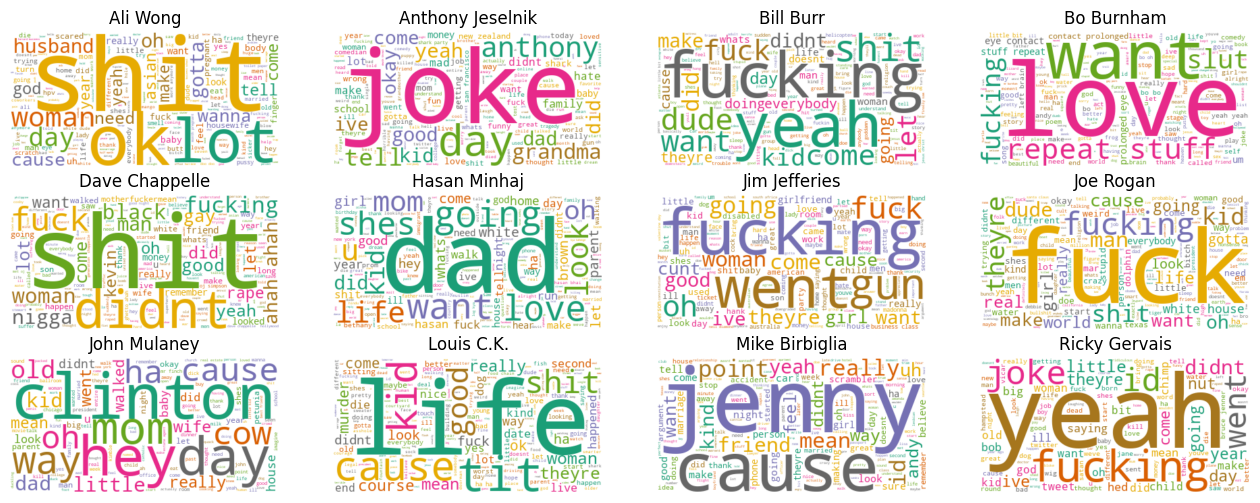

In [13]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data_dtm.columns):
    wc.generate(data_clean["transcript"][comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings
* Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
* A lot of people use the F-word. Let's dig into that later.

### Number of Words
Analysis

In [14]:
data_dtm.columns

Index(['ali', 'anthony', 'bill', 'bo', 'dave', 'hasan', 'jim', 'joe', 'john',
       'louis', 'mike', 'ricky'],
      dtype='object')

Find the number of unique words that each comedian uses

In [15]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data_dtm.columns:
    uniques = data_dtm[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,910
9,Louis C.K.,996
6,Jim Jefferies,1179
3,Bo Burnham,1202
0,Ali Wong,1256
8,John Mulaney,1287
4,Dave Chappelle,1292
7,Joe Rogan,1299
10,Mike Birbiglia,1377
5,Hasan Minhaj,1444


Calculate the words per minute of each comedian

In [16]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data_dtm.columns:
    totals = sum(data_dtm[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,910,2953,59,50.050847
3,Bo Burnham,1202,3144,60,52.400000
0,Ali Wong,1256,3322,60,55.366667
9,Louis C.K.,996,3306,58,57.000000
6,Jim Jefferies,1179,4712,77,61.194805
4,Dave Chappelle,1292,4234,67,63.194030
11,Ricky Gervais,1506,5005,79,63.354430
10,Mike Birbiglia,1377,4870,76,64.078947
5,Hasan Minhaj,1444,4837,73,66.260274
8,John Mulaney,1287,4118,62,66.419355


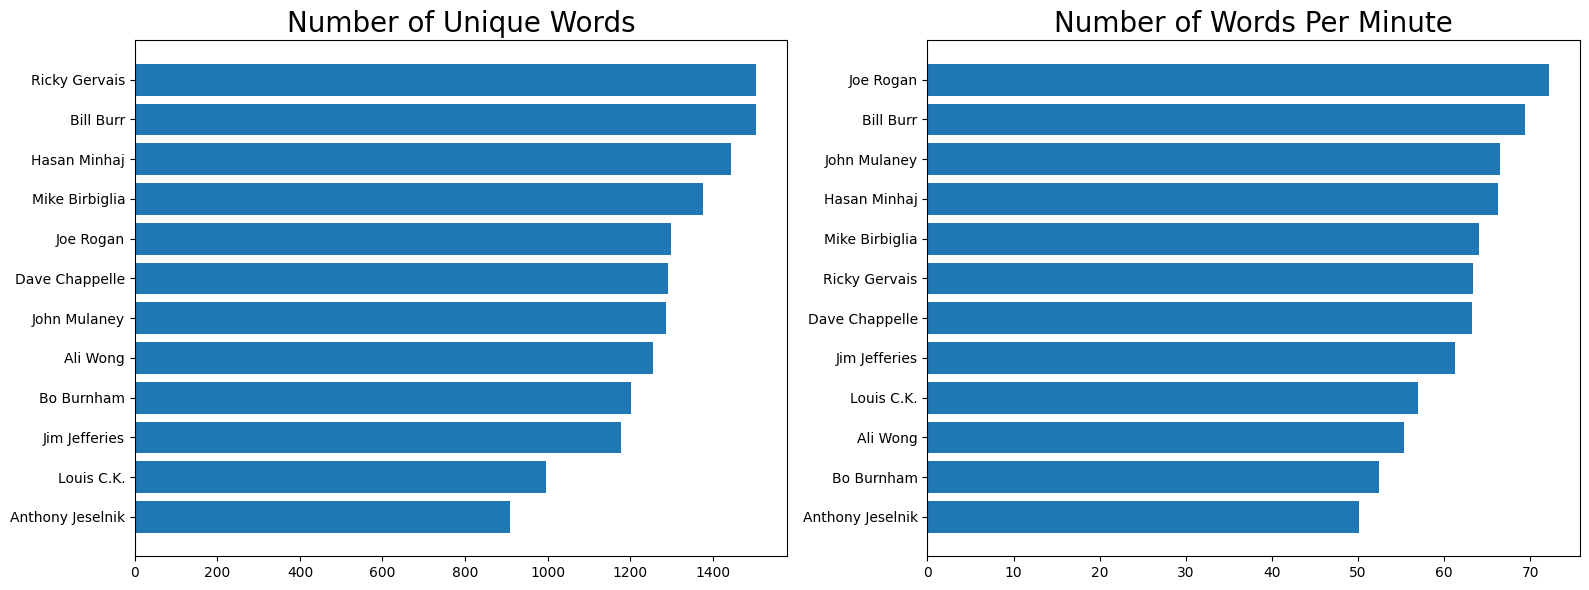

In [17]:
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

- Vocabulary
    - Bill Gervais (podcast host) and Ricky Gervais (British comedy) use a lot of words in their comedy
    - Anthony C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary

- Talking Speed
    - Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
    - Anthony Jeselnik (dark humor) and Bo Burnham (musical comedy) talk slow


Alin Wong is somewhere in the middle in both cases. Nothing too interesting here.

### Amount of Profanity
Analysis

In [18]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('wa', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('guy', 8),
 ('thing', 8),
 ('say', 8),
 ('think', 8),
 ('gonna', 7),
 ('said', 7),
 ('day', 6),
 ('oh', 6),
 ('cause', 6),
 ('come', 6),
 ('yeah', 6),
 ('kid', 6),
 ('fucking', 6),
 ('want', 6),
 ('shit', 5),
 ('good', 5),
 ('theyre', 5),
 ('woman', 4),
 ('did', 4),
 ('fuck', 4),
 ('going', 4),
 ('dude', 3),
 ('dad', 3),
 ('didnt', 3),
 ('man', 3),
 ('little', 3),
 ('lot', 2),
 ('tell', 2),
 ('joke', 2),
 ('make', 2),
 ('love', 2),
 ('life', 2),
 ('mom', 2),
 ('hey', 2),
 ('went', 2),
 ('ive', 2),
 ('ha', 2),
 ('really', 2),
 ('mean', 2),
 ('id', 2),
 ('ok', 1),
 ('wanna', 1),
 ('husband', 1),
 ('gotta', 1),
 ('need', 1),
 ('pregnant', 1),
 ('god', 1),
 ('asian', 1),
 ('anthony', 1),
 ('shark', 1),
 ('grandma', 1),
 ('school', 1),
 ('baby', 1),
 ('let', 1),
 ('bo', 1),
 ('stuff', 1),
 ('repeat', 1),
 ('eye',

In [19]:
# Let's isolate just these bad words
data_bad_words = data_dtm.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,35
anthony,15,9
bill,107,64
bo,37,7
dave,65,47
hasan,24,15
jim,119,20
joe,139,40
john,4,6
louis,22,25


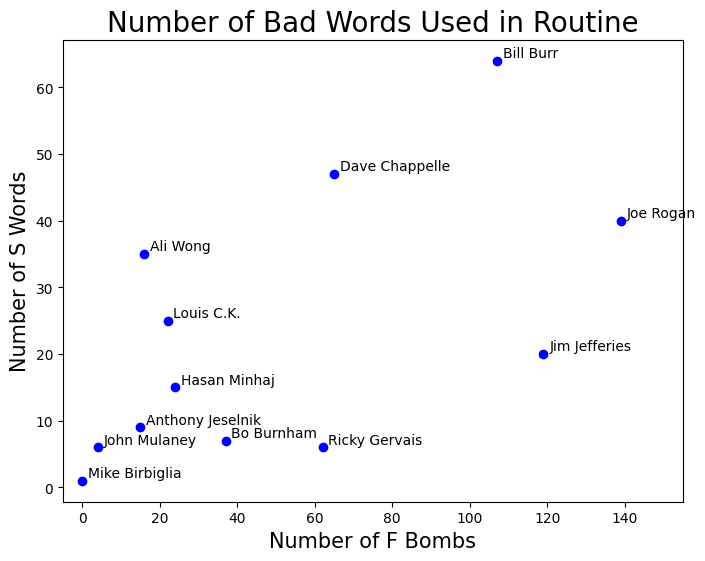

In [20]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [8, 6]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

- **Averaging 2 F-Bombds Per Minute!** - 

- **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other fravorite comedians in this group are John Mulaney and Mie Birbiglia

Conclusion - There are definitely some things that could be better cleaned up, such as adding more stops words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and maje general sense